<a href="https://colab.research.google.com/github/Ananya2003Gupta/103e4d5d-338a-450d-bf0c-8a8c6901b1f8/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
#Uploading dataset from local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AQI Data.csv to AQI Data.csv
User uploaded file "AQI Data.csv" with length 8600 bytes


In [ ]:
#Loading the dataset
df = pd.read_csv('AQI Data.csv')

In [ ]:
#Printing the dataframe

print(df)

     Location    Date   AQI
0    Adilabad  Jan-16 67.00
1    Adilabad  Feb-16 68.00
2    Adilabad  Mar-16 71.00
3    Adilabad  Apr-16 70.00
4    Adilabad  May-16 71.00
..        ...     ...   ...
415  Warangal  Aug-22 56.00
416  Warangal  Sep-22 48.00
417  Warangal  Oct-22 64.00
418  Warangal  Nov-22 94.00
419  Warangal  Dec-22 94.00

[420 rows x 3 columns]


In [ ]:
#Display all the column/attribute names

df.columns

Index(['Location', 'Date', 'AQI'], dtype='object')

In [ ]:
#Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  420 non-null    object 
 1   Date      420 non-null    object 
 2   AQI       408 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.0+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
print(df)
#df = df.set_index('Date')

     Location       Date   AQI
0    Adilabad 2016-01-01 67.00
1    Adilabad 2016-02-01 68.00
2    Adilabad 2016-03-01 71.00
3    Adilabad 2016-04-01 70.00
4    Adilabad 2016-05-01 71.00
..        ...        ...   ...
415  Warangal 2022-08-01 56.00
416  Warangal 2022-09-01 48.00
417  Warangal 2022-10-01 64.00
418  Warangal 2022-11-01 94.00
419  Warangal 2022-12-01 94.00

[420 rows x 3 columns]


In [ ]:
df.describe()

,AQI
count,408.00
mean,71.56
std,17.34
min,31.00
25%,60.00
50%,69.00
75%,83.25
max,137.00


In [ ]:
#Display the datatypes of all the columns/attributes of dataframe

df.dtypes

Location            object
Date        datetime64[ns]
AQI                float64
dtype: object

In [ ]:
#Display the first five rows of the dataframe

print(df.head())

   Location       Date   AQI
0  Adilabad 2016-01-01 67.00
1  Adilabad 2016-02-01 68.00
2  Adilabad 2016-03-01 71.00
3  Adilabad 2016-04-01 70.00
4  Adilabad 2016-05-01 71.00


In [ ]:
# Display the last five rows of the dataframe

print(df.tail())

     Location       Date   AQI
415  Warangal 2022-08-01 56.00
416  Warangal 2022-09-01 48.00
417  Warangal 2022-10-01 64.00
418  Warangal 2022-11-01 94.00
419  Warangal 2022-12-01 94.00


In [ ]:
#Sort the dataframe in ascending order based on Location values

df.sort_values('Location')

,Location,Date,AQI
0,Adilabad,2016-01-01,67.00
60,Adilabad,2021-01-01,NaN
59,Adilabad,2020-12-01,NaN
58,Adilabad,2020-11-01,NaN
57,Adilabad,2020-10-01,72.00
...,...,...,...
359,Warangal,2017-12-01,78.00
358,Warangal,2017-11-01,76.00
357,Warangal,2017-10-01,62.00
365,Warangal,2018-06-01,84.00


In [ ]:
#Dispaly the sum of the null values in each column/attribute

df.isnull().sum()

Location     0
Date         0
AQI         12
dtype: int64

In [ ]:
df_Ad = df[df['Location'].isin(['Adilabad'])]
df_Ka = df[df['Location'].isin(['Karimnagar'])]
df_Kh = df[df['Location'].isin(['Khammam'])]
df_Ni = df[df['Location'].isin(['Nizamabad'])]
df_W = df[df['Location'].isin(['Warangal'])]

<AxesSubplot:xlabel='Date'>

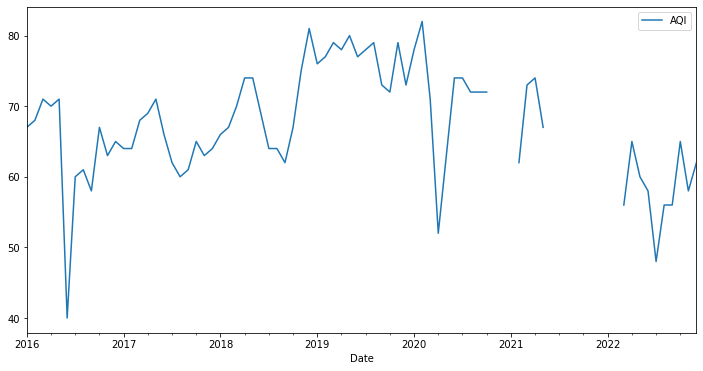

In [ ]:
# Adilabad

df_Ad.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

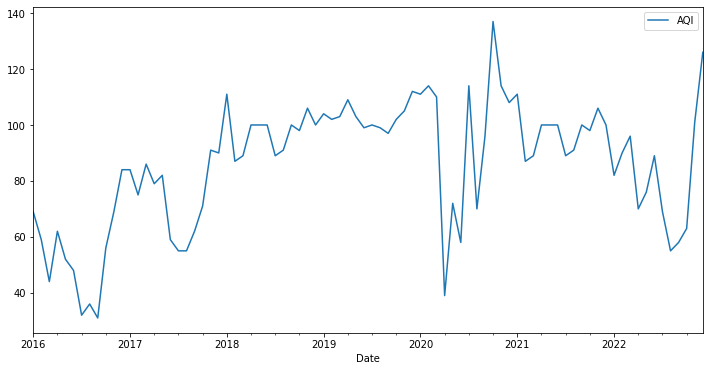

In [ ]:
# Karimnagar

df_Ka.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

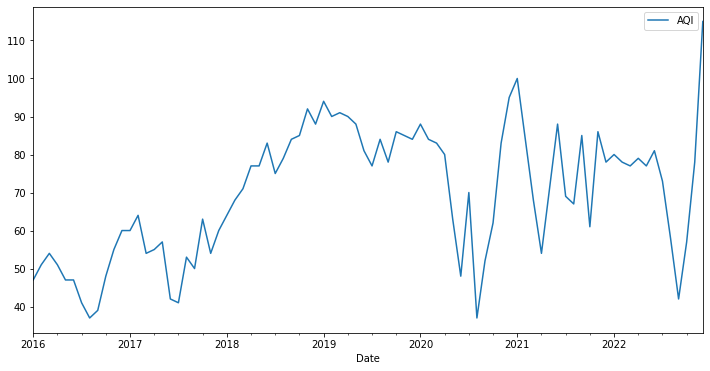

In [ ]:
# Khamman

df_Kh.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

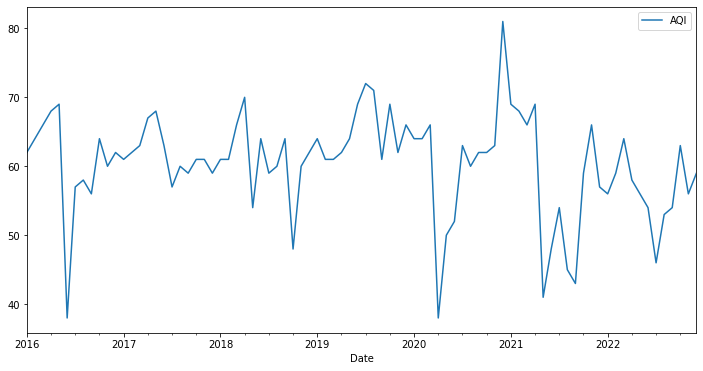

In [ ]:
#Nizamabad

df_Ni.plot(x='Date', y='AQI', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

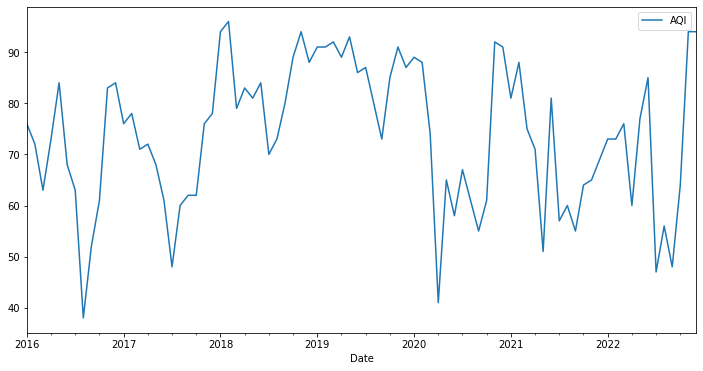

In [ ]:
# Warangal

df_W.plot(x='Date', y='AQI', figsize=(12,6))

# Comparison of Models for prediction of AQI

In [ ]:
from darts import TimeSeries
from darts.models import ARIMA, AutoARIMA, ExponentialSmoothing, FFT, Theta, StatsForecastETS, StatsForecastAutoARIMA, Prophet, NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score, rmse, mae

filler = MissingValuesFiller()
scaler = Scaler()

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

# Adilabad

In [ ]:
df_Ad.describe()

,AQI
count,72.00
mean,67.53
std,8.05
min,40.00
25%,62.75
50%,67.00
75%,73.25
max,82.00


<AxesSubplot:xlabel='Date'>

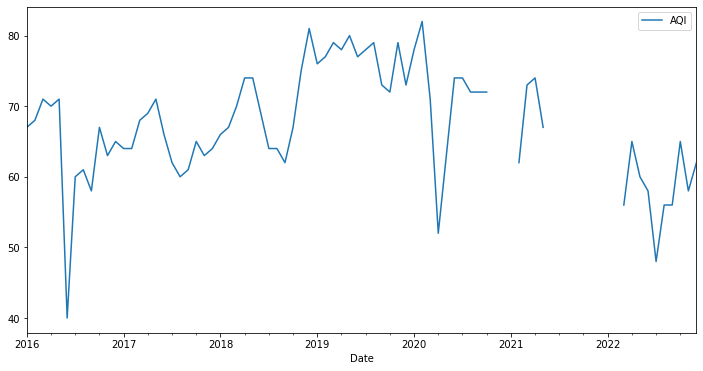

In [ ]:
df_Ad.plot(x='Date', y='AQI', figsize=(12,6))

## Filling Missing Values using Interpolation

In [ ]:
print(df_Ad.tail(30))

    Location       Date   AQI
54  Adilabad 2020-07-01 74.00
55  Adilabad 2020-08-01 72.00
56  Adilabad 2020-09-01 72.00
57  Adilabad 2020-10-01 72.00
58  Adilabad 2020-11-01   NaN
59  Adilabad 2020-12-01   NaN
60  Adilabad 2021-01-01   NaN
61  Adilabad 2021-02-01 62.00
62  Adilabad 2021-03-01 73.00
63  Adilabad 2021-04-01 74.00
64  Adilabad 2021-05-01 67.00
65  Adilabad 2021-06-01   NaN
66  Adilabad 2021-07-01   NaN
67  Adilabad 2021-08-01   NaN
68  Adilabad 2021-09-01   NaN
69  Adilabad 2021-10-01   NaN
70  Adilabad 2021-11-01   NaN
71  Adilabad 2021-12-01   NaN
72  Adilabad 2022-01-01   NaN
73  Adilabad 2022-02-01   NaN
74  Adilabad 2022-03-01 56.00
75  Adilabad 2022-04-01 65.00
76  Adilabad 2022-05-01 60.00
77  Adilabad 2022-06-01 58.00
78  Adilabad 2022-07-01 48.00
79  Adilabad 2022-08-01 56.00
80  Adilabad 2022-09-01 56.00
81  Adilabad 2022-10-01 65.00
82  Adilabad 2022-11-01 58.00
83  Adilabad 2022-12-01 62.00


In [ ]:
# Filling Missing Values using Interpolation

df_Ad['Interpolated_Spline']= df_Ad['AQI'].interpolate(option='spline')

<ipython-input-31-d579f837e816>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ad['Interpolated_Spline']= df_Ad['AQI'].interpolate(option='spline')


In [ ]:
print(df_Ad)

    Location       Date   AQI  Interpolated_Spline
0   Adilabad 2016-01-01 67.00                67.00
1   Adilabad 2016-02-01 68.00                68.00
2   Adilabad 2016-03-01 71.00                71.00
3   Adilabad 2016-04-01 70.00                70.00
4   Adilabad 2016-05-01 71.00                71.00
..       ...        ...   ...                  ...
79  Adilabad 2022-08-01 56.00                56.00
80  Adilabad 2022-09-01 56.00                56.00
81  Adilabad 2022-10-01 65.00                65.00
82  Adilabad 2022-11-01 58.00                58.00
83  Adilabad 2022-12-01 62.00                62.00

[84 rows x 4 columns]


In [ ]:
print(df_Ad.tail(30))

    Location       Date   AQI  Interpolated_Spline
54  Adilabad 2020-07-01 74.00                74.00
55  Adilabad 2020-08-01 72.00                72.00
56  Adilabad 2020-09-01 72.00                72.00
57  Adilabad 2020-10-01 72.00                72.00
58  Adilabad 2020-11-01   NaN                69.50
59  Adilabad 2020-12-01   NaN                67.00
60  Adilabad 2021-01-01   NaN                64.50
61  Adilabad 2021-02-01 62.00                62.00
62  Adilabad 2021-03-01 73.00                73.00
63  Adilabad 2021-04-01 74.00                74.00
64  Adilabad 2021-05-01 67.00                67.00
65  Adilabad 2021-06-01   NaN                65.90
66  Adilabad 2021-07-01   NaN                64.80
67  Adilabad 2021-08-01   NaN                63.70
68  Adilabad 2021-09-01   NaN                62.60
69  Adilabad 2021-10-01   NaN                61.50
70  Adilabad 2021-11-01   NaN                60.40
71  Adilabad 2021-12-01   NaN                59.30
72  Adilabad 2022-01-01   NaN  

In [ ]:
df_Ad['AQI'] = df_Ad['Interpolated_Spline']

<ipython-input-34-484b7a539516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ad['AQI'] = df_Ad['Interpolated_Spline']


In [ ]:
df_Ad.drop(['Interpolated_Spline'], axis=1)

,Location,Date,AQI
0,Adilabad,2016-01-01,67.00
1,Adilabad,2016-02-01,68.00
2,Adilabad,2016-03-01,71.00
3,Adilabad,2016-04-01,70.00
4,Adilabad,2016-05-01,71.00
...,...,...,...
79,Adilabad,2022-08-01,56.00
80,Adilabad,2022-09-01,56.00
81,Adilabad,2022-10-01,65.00
82,Adilabad,2022-11-01,58.00


In [ ]:
series = TimeSeries.from_dataframe(df_Ad, 'Date',['AQI'])

In [ ]:
train_Ad, test_Ad = series.split_after(pd.Timestamp('20211201'))
test = test_Ad

In [ ]:
scaler.fit(train_Ad)
scaled_train = scaler.transform(train_Ad)
scaled_test = scaler.transform(test_Ad)

## Exponential Smoothening

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

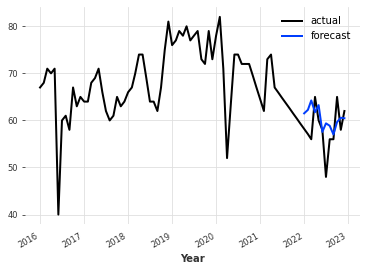

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

4.0286041824105014
7.196123356262139
-0.3174962402314383
5.024509754024247


## Prediction of AQI using Exponential Smoothening

In [ ]:
train_Ad = series
scaler.fit(train_Ad)
scaled_train = scaler.transform(train_Ad)

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

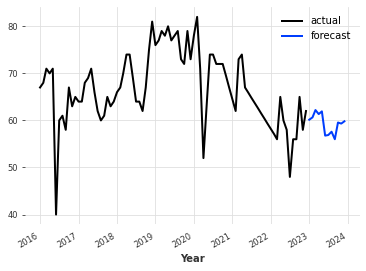

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
print(pred)

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[60.15612811]],

       [[60.64784131]],

       [[62.2064937 ]],

       [[61.34708695]],

       [[61.92698197]],

       [[56.77449416]],

       [[56.90087475]],

       [[57.59795257]],

       [[56.00769915]],

       [[59.55710223]],

       [[59.3301995 ]],

       [[59.81849439]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-12-01
  * component  (component) object 'AQI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


## Predicted Values of AQI for Adilabad from January 2023 to February 2023



<ul>
<li>Adilabad:
<br>
<table align="center">
<tr>
<th> Month </th>
<th> AQI (decimal) </th>
<th> AQI (integer) </th>
</tr>
<tr>
<td> January 2023 </td>
<td> 60.16
<td> 60
</tr>
<tr>
<td> February 2023 </td>
<td> 60.65
<td> 61
</tr>
<tr>
<td> March 2023 </td>
<td> 62.21
<td> 62
</tr>
<tr>
<td> April 2023 </td>
<td> 61.35
<td> 61
</tr>
<tr>
<td> May 2023 </td>
<td> 61.93
<td> 62
</tr>
<tr>
<td> June 2023 </td>
<td> 56.77
<td> 57
</tr>
<tr>
<td> July 2023 </td>
<td> 56.90
<td> 57
</tr>
<tr>
<td> August 2023 </td>
<td> 57.60
<td> 58
</tr>
<tr>
<td> September 2023 </td>
<td> 56.01
<td> 56
</tr>
<tr>
<td> October 2023</td>
<td> 59.56
<td> 60
</tr>
<tr>
<td> November 2023 </td>
<td> 59.33
<td> 59
</tr>
<tr>
<td> December 2023 </td>
<td> 59.82
<td> 60
</tr>
</table>

# Warangal

In [ ]:
df_W.describe()

,AQI
count,84.00
mean,73.70
std,14.06
min,38.00
25%,62.75
50%,74.50
75%,85.25
max,96.00


<AxesSubplot:xlabel='Date'>

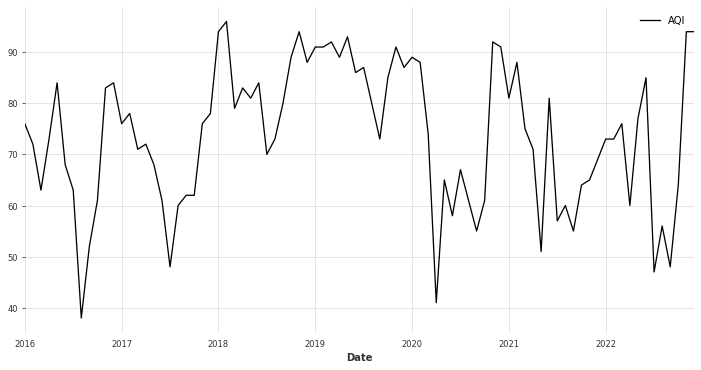

In [ ]:
df_W.plot(x='Date', y='AQI', figsize=(12,6))

In [ ]:
series = TimeSeries.from_dataframe(df_W, 'Date',['AQI'])

In [ ]:
train_W, test_W = series.split_after(pd.Timestamp('20211201'))
test = test_W

In [ ]:
scaler.fit(train_W)
scaled_train = scaler.transform(train_W)
scaled_test = scaler.transform(test_W)

## Exponential Smoothening

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

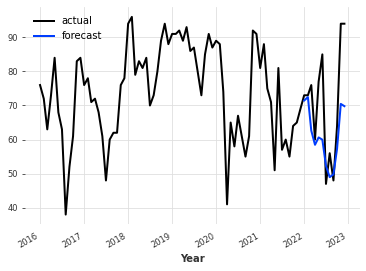

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

10.576681596927527
13.541585215928928
0.16951758707968756
13.972358665058602


## Prediction of AQI using Exponential Smoothening

In [ ]:
train_W = series
scaler.fit(train_W)
scaled_train = scaler.transform(train_W)

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

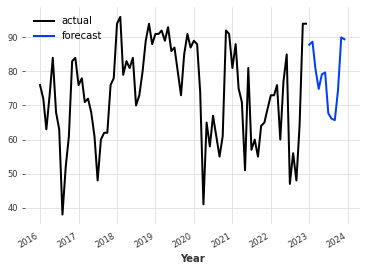

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
print(pred)

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[87.8487036 ]],

       [[88.71698943]],

       [[80.70994321]],

       [[74.85387077]],

       [[79.13695066]],

       [[79.70966984]],

       [[67.70864636]],

       [[66.13968685]],

       [[65.71166014]],

       [[74.43049295]],

       [[89.99314489]],

       [[89.43058812]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-12-01
  * component  (component) object 'AQI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


## Predicted Values of AQI for Warangal from January 2023 to February 2023



<ul>
<li>Warangal:
<br>
<table align="center">
<tr>
<th> Month </th>
<th> AQI (decimal) </th>
<th> AQI (integer) </th>
</tr>
<tr>
<td> January 2023 </td>
<td> 87.85
<td> 88
</tr>
<tr>
<td> February 2023 </td>
<td> 88.72
<td> 89
</tr>
<tr>
<td> March 2023 </td>
<td> 80.71
<td> 81
</tr>
<tr>
<td> April 2023 </td>
<td> 74.85
<td> 75
</tr>
<tr>
<td> May 2023 </td>
<td> 79.14
<td> 79
</tr>
<tr>
<td> June 2023 </td>
<td> 79.71
<td> 80
</tr>
<tr>
<td> July 2023 </td>
<td> 67.71
<td> 68
</tr>
<tr>
<td> August 2023 </td>
<td> 66.14
<td> 66
</tr>
<tr>
<td> September 2023 </td>
<td> 65.71
<td> 66
</tr>
<tr>
<td> October 2023</td>
<td> 74.43
<td> 74
</tr>
<tr>
<td> November 2023 </td>
<td> 89.99
<td> 90
</tr>
<tr>
<td> December 2023 </td>
<td> 89.43
<td> 89
</tr>
</table>

# Nizamabad

In [ ]:
df_Ni.describe()

,AQI
count,84.00
mean,60.29
std,7.51
min,38.00
25%,57.00
50%,61.00
75%,64.00
max,81.00


<AxesSubplot:xlabel='Date'>

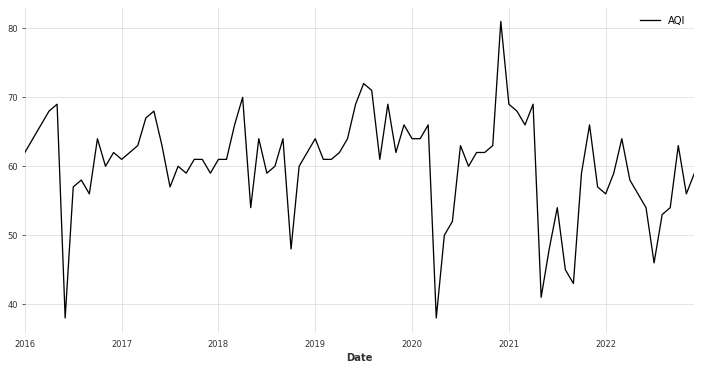

In [ ]:
df_Ni.plot(x='Date', y='AQI', figsize=(12,6))

In [ ]:
series = TimeSeries.from_dataframe(df_Ni, 'Date',['AQI'])

In [ ]:
train_Ni, test_Ni = series.split_after(pd.Timestamp('20211201'))
test = test_Ni

In [ ]:
scaler.fit(train_Ni)
scaled_train = scaler.transform(train_Ni)
scaled_test = scaler.transform(test_Ni)

## Exponential Smoothening

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

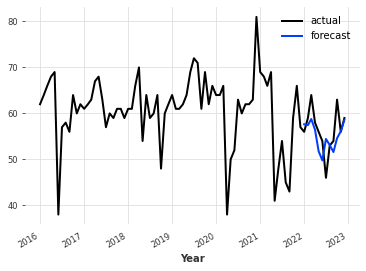

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

3.186063832987733
5.741683917760908
0.12440358976015431
4.262467068785024


## Prediction of AQI using Exponential Smoothening

In [ ]:
train_Ni = series
scaler.fit(train_Ni)
scaled_train = scaler.transform(train_Ni)

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

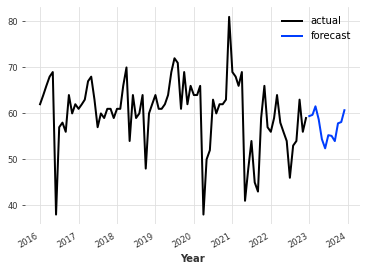

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
print(pred)

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[59.41295772]],

       [[59.69539897]],

       [[61.54686623]],

       [[58.69193608]],

       [[54.40838278]],

       [[52.40923535]],

       [[55.2675015 ]],

       [[55.12159338]],

       [[53.98112115]],

       [[57.84340761]],

       [[58.12584864]],

       [[60.69978873]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-12-01
  * component  (component) object 'AQI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


## Predicted Values of AQI for Nizamabad from January 2023 to February 2023



<ul>
<li>Nizamabad:
<br>
<table align="center">
<tr>
<th> Month </th>
<th> AQI (decimal) </th>
<th> AQI (integer) </th>
</tr>
<tr>
<td> January 2023 </td>
<td> 59.41
<td> 59
</tr>
<tr>
<td> February 2023 </td>
<td> 59.70
<td> 60
</tr>
<tr>
<td> March 2023 </td>
<td> 61.55
<td> 62
</tr>
<tr>
<td> April 2023 </td>
<td> 58.69
<td> 59
</tr>
<tr>
<td> May 2023 </td>
<td> 54.41
<td> 54
</tr>
<tr>
<td> June 2023 </td>
<td> 52.41
<td> 52
</tr>
<tr>
<td> July 2023 </td>
<td> 55.27
<td> 55
</tr>
<tr>
<td> August 2023 </td>
<td> 55.12
<td> 55
</tr>
<tr>
<td> September 2023 </td>
<td> 53.98
<td> 54
</tr>
<tr>
<td> October 2023</td>
<td> 57.84
<td> 58
</tr>
<tr>
<td> November 2023 </td>
<td> 58.13
<td> 58
</tr>
<tr>
<td> December 2023 </td>
<td> 60.70
<td> 61
</tr>
</table>

# Khamman

In [ ]:
df_Kh.describe()

,AQI
count,84.00
mean,69.67
std,17.08
min,37.00
25%,54.75
50%,72.00
75%,84.00
max,115.00


<AxesSubplot:xlabel='Date'>

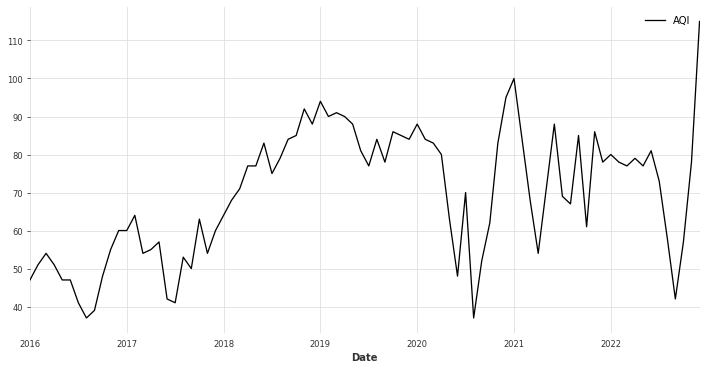

In [ ]:
df_Kh.plot(x='Date', y='AQI', figsize=(12,6))

<Figure size 1728x576 with 0 Axes>

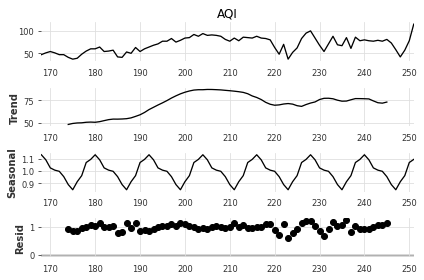

<Figure size 1728x576 with 0 Axes>

In [ ]:
dec = sm.tsa.seasonal_decompose(df_Kh['AQI'],period = 12, model = 'multiplicative').plot()
plt.figure(figsize = (24,8))

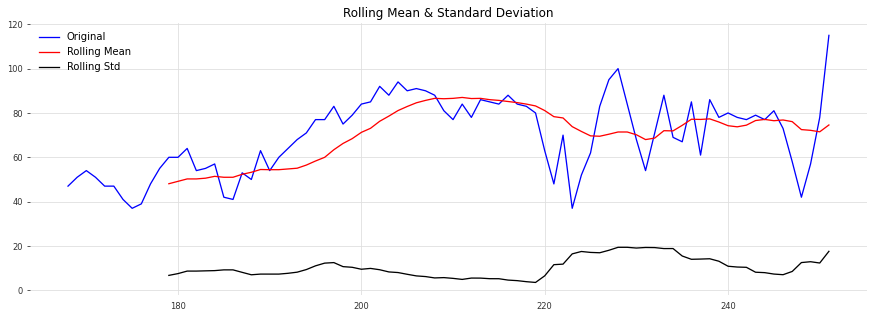

Results of Dickey-Fuller Test:
Test Statistic                -2.75
p-value                        0.07
#Lags Used                     0.00
Number of Observations Used   83.00
Critical Value (1%)           -3.51
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [ ]:
test_stationarity(df_Kh['AQI'])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


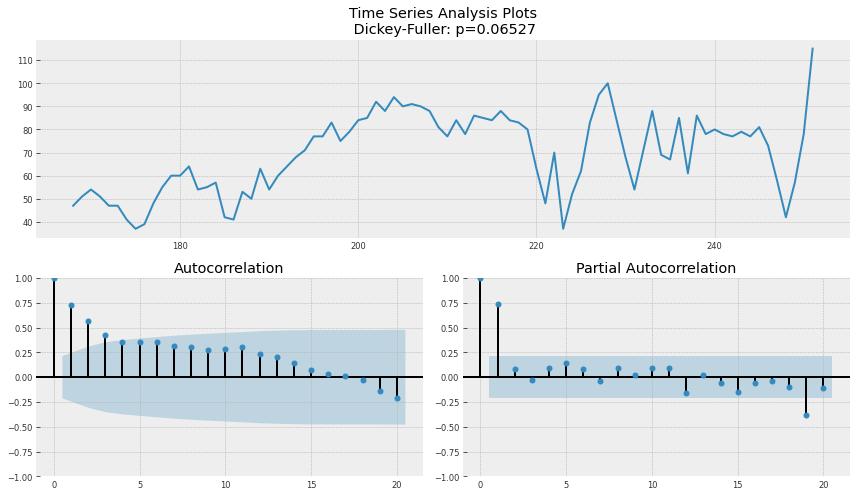

In [ ]:
tsplot(df_Kh['AQI'])

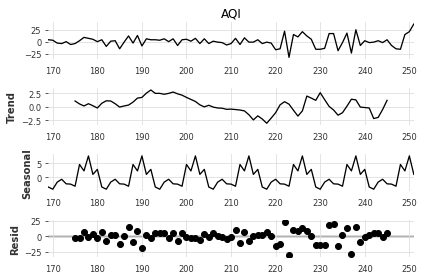

In [ ]:
data_diff = df_Kh['AQI'].diff()
data_diff = data_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_diff,period = 12).plot()
plt.show()

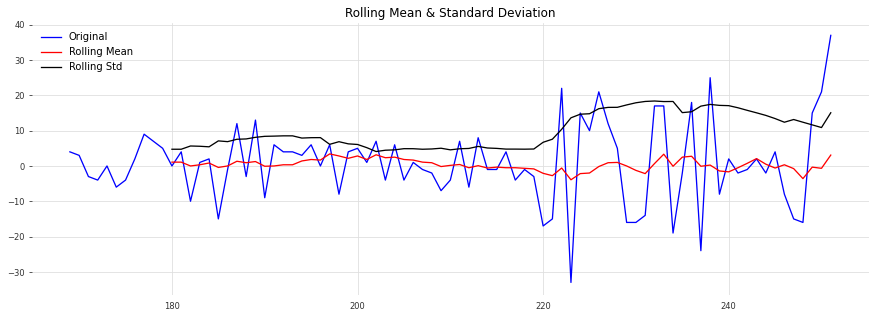

Results of Dickey-Fuller Test:
Test Statistic                -5.57
p-value                        0.00
#Lags Used                     4.00
Number of Observations Used   78.00
Critical Value (1%)           -3.52
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [ ]:
test_stationarity(data_diff)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


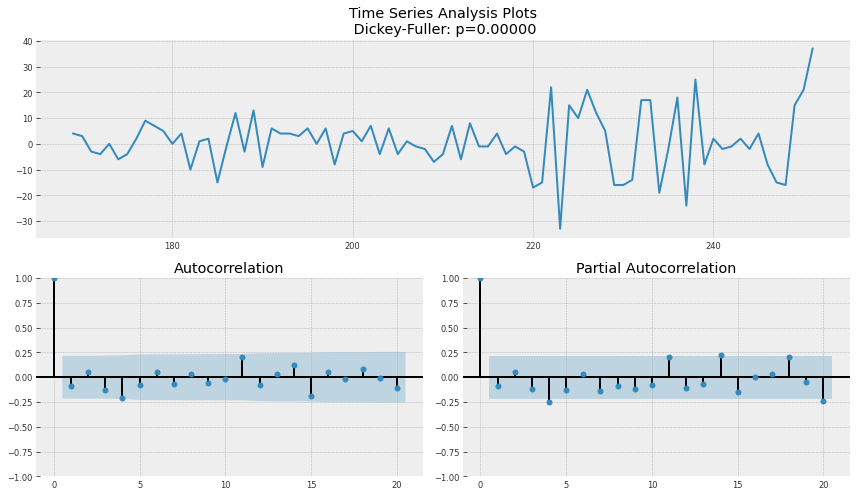

In [ ]:
tsplot(data_diff)

In [ ]:
series = TimeSeries.from_dataframe(df_Kh, 'Date',['AQI'])

In [ ]:
train_Kh, test_Kh = series.split_after(pd.Timestamp('20211201'))
test = test_Kh

In [ ]:
scaler.fit(train_Kh)
scaled_train = scaler.transform(train_Kh)
scaled_test = scaler.transform(test_Kh)

## Exponential Smoothening

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

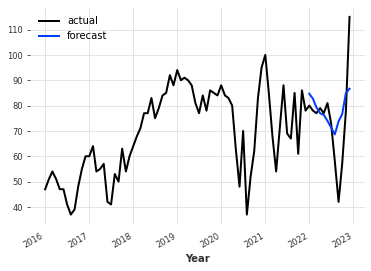

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

10.038584307192911
15.947950077395626
0.27528932413593465
14.344072178988982


## Prediction of AQI using Exponential Smoothening

In [ ]:
train_Kh = series
scaler.fit(train_Kh)
scaled_train = scaler.transform(train_Kh)

In [ ]:
model = ExponentialSmoothing()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

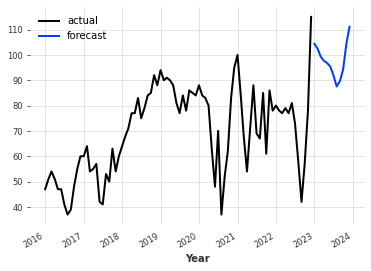

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
print(pred)

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[104.40453589]],

       [[102.40368216]],

       [[ 99.40308768]],

       [[ 97.68957151]],

       [[ 96.83135719]],

       [[ 95.40222073]],

       [[ 91.97334689]],

       [[ 87.54362151]],

       [[ 89.68831236]],

       [[ 94.25857968]],

       [[104.40356247]],

       [[111.11583995]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-12-01
  * component  (component) object 'AQI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


## ARIMA

In [ ]:
model = ARIMA ()
model.fit(scaled_train)
pred = model.predict(n=12, series=scaled_train)

Text(0.5, 0, 'Year')

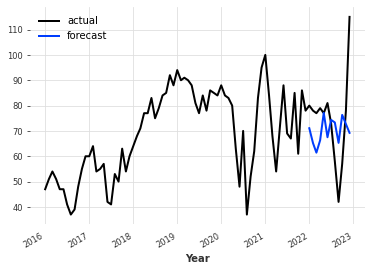

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

14.500709824296303
20.41316428763531
-0.2048814169561075
18.495338558640285


## Prediction of AQI using ARIMA

In [ ]:
train_Kh = series
scaler.fit(train_Kh)
scaled_train = scaler.transform(train_Kh)

In [ ]:
model = ARIMA()
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

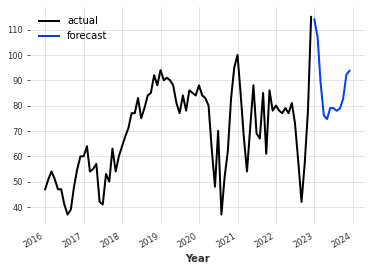

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
print(pred)

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[114.02551836]],

       [[106.93477763]],

       [[ 89.0471022 ]],

       [[ 76.12859506]],

       [[ 74.68675357]],

       [[ 79.04507148]],

       [[ 79.00369289]],

       [[ 77.93409816]],

       [[ 78.8502294 ]],

       [[ 82.65994006]],

       [[ 92.22061407]],

       [[ 93.73438065]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-12-01
  * component  (component) object 'AQI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


## Predicted Values of AQI for Khamman from January 2023 to February 2023



<ul>
<li>Khamman:
<br>
<table align="center">
<tr>
<th> Month </th>
<th> AQI (decimal) </th>
<th> AQI (integer) </th>
</tr>
<tr>
<td> January 2023 </td>
<td> 114.03
<td> 114
</tr>
<tr>
<td> February 2023 </td>
<td> 106.93
<td> 107
</tr>
<tr>
<td> March 2023 </td>
<td> 89.04
<td> 89
</tr>
<tr>
<td> April 2023 </td>
<td> 76.13
<td> 76
</tr>
<tr>
<td> May 2023 </td>
<td> 74.69
<td> 75
</tr>
<tr>
<td> June 2023 </td>
<td> 79.05
<td> 79
</tr>
<tr>
<td> July 2023 </td>
<td> 79.01
<td> 79
</tr>
<tr>
<td> August 2023 </td>
<td> 77.93
<td> 78
</tr>
<tr>
<td> September 2023 </td>
<td> 78.85
<td> 79
</tr>
<tr>
<td> October 2023</td>
<td> 82.65
<td> 83
</tr>
<tr>
<td> November 2023 </td>
<td> 92.22
<td> 92
</tr>
<tr>
<td> December 2023 </td>
<td> 93.73
<td> 94
</tr>
</table>

# Karimnagar

In [ ]:
df_Ka.describe()

,AQI
count,84.00
mean,86.02
std,22.59
min,31.00
25%,69.75
50%,90.50
75%,100.25
max,137.00


<AxesSubplot:xlabel='Date'>

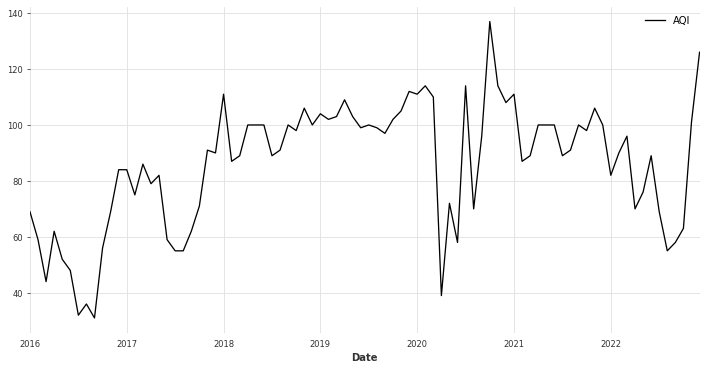

In [ ]:
df_Ka.plot(x='Date', y='AQI', figsize=(12,6))

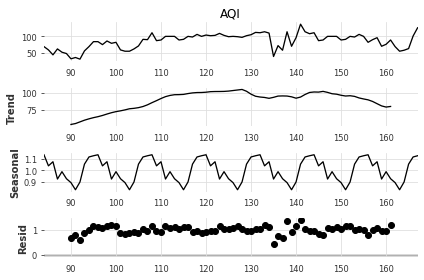

In [ ]:
dec = sm.tsa.seasonal_decompose(df_Ka['AQI'],period = 12, model = 'multiplicative').plot()

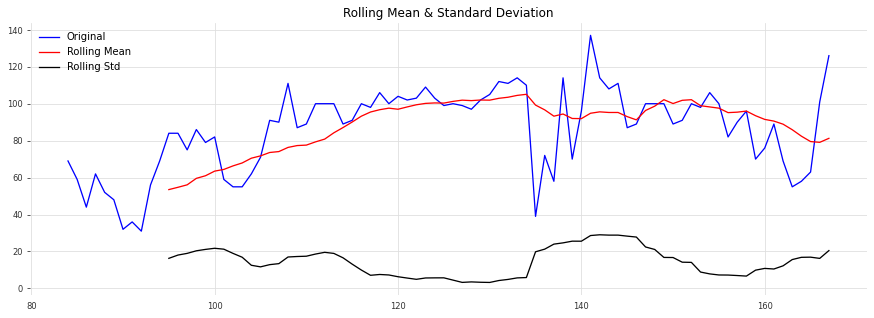

Results of Dickey-Fuller Test:
Test Statistic                -3.54
p-value                        0.01
#Lags Used                     0.00
Number of Observations Used   83.00
Critical Value (1%)           -3.51
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


In [ ]:
test_stationarity(df_Ka['AQI'])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


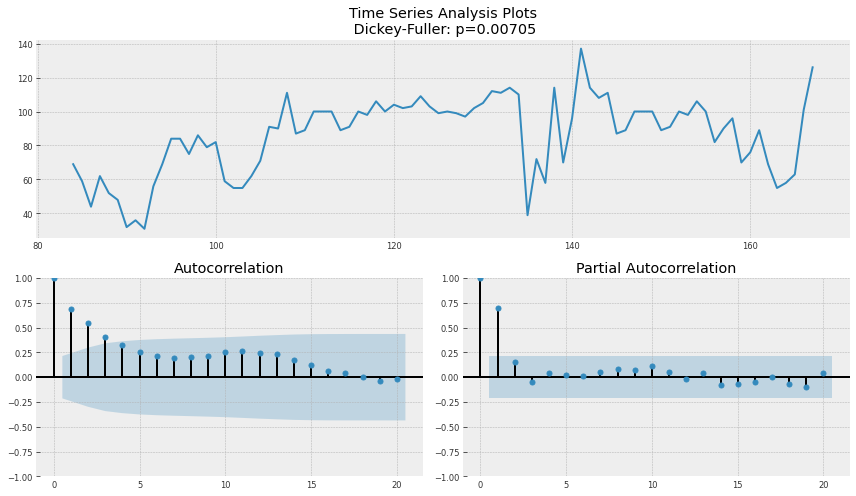

In [ ]:
tsplot(df_Ka['AQI'])

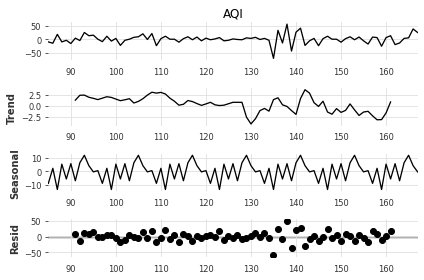

In [ ]:
data_diff = df_Ka['AQI'].diff()
data_diff = data_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_diff,period = 12).plot()
plt.show()

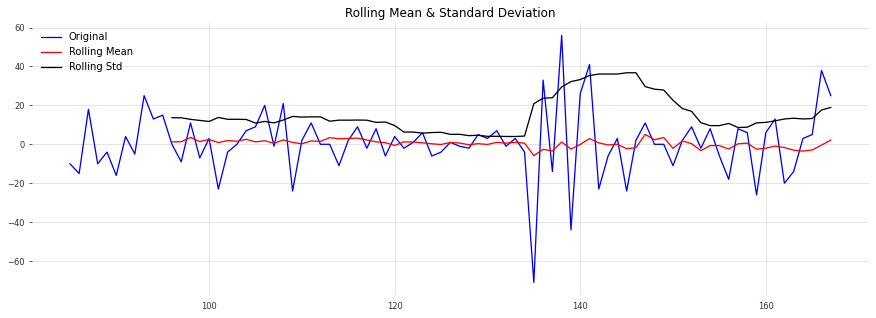

Results of Dickey-Fuller Test:
Test Statistic                -11.70
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used    82.00
Critical Value (1%)            -3.51
Critical Value (5%)            -2.90
Critical Value (10%)           -2.59
dtype: float64


In [ ]:
test_stationarity(data_diff)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


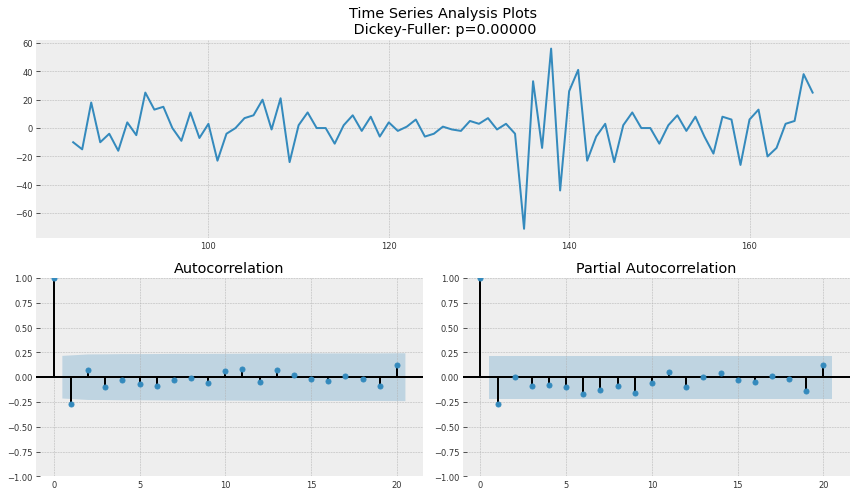

In [ ]:
tsplot(data_diff)

In [ ]:
series = TimeSeries.from_dataframe(df_Ka, 'Date',['AQI'])

In [ ]:
train_Ka, test_Ka = series.split_after(pd.Timestamp('20211201'))
test = test_Ka

In [ ]:
scaler.fit(train_Ka)
scaled_train = scaler.transform(train_Ka)
scaled_test = scaler.transform(test_Ka)

## FFT

In [ ]:
model = FFT(nr_freqs_to_keep=12, trend='poly')
model.fit(scaled_train)
pred = model.predict(n=12)
type(pred)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

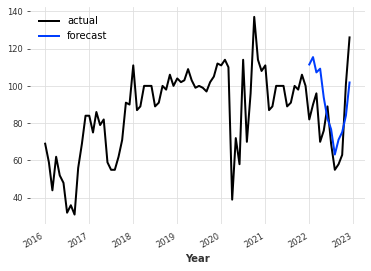

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
MAE = mae(test,pred)
print(MAE)
MAPE = mape(test,pred)
print(MAPE)
R2_SCORE = r2_score(test,pred)
print(R2_SCORE)
RMSE = rmse(test,pred)
print(RMSE)

17.677645643002723
22.23969342726968
-0.05347414794385341
20.126667813189886


## Prediction of AQI using FFT

In [ ]:
train_Ka = series
scaler.fit(train_Ka)
scaled_train = scaler.transform(train_Ka)

In [ ]:
model = FFT(nr_freqs_to_keep=12, trend='poly')
model.fit(scaled_train)
pred = model.predict(n=12)

Text(0.5, 0, 'Year')

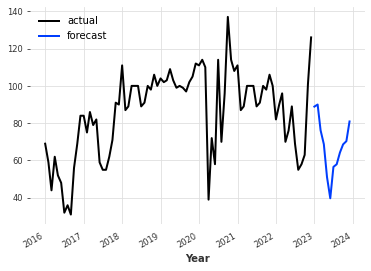

In [ ]:
pred = scaler.inverse_transform(pred)
series.plot(label='actual')
pred.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

In [ ]:
print(pred)

<TimeSeries (DataArray) (Date: 12, component: 1, sample: 1)>
array([[[88.89468698]],

       [[89.99357809]],

       [[76.20768665]],

       [[68.71815259]],

       [[51.12044204]],

       [[39.72848461]],

       [[56.55659844]],

       [[57.96883895]],

       [[64.27841063]],

       [[68.64723072]],

       [[70.35059605]],

       [[80.92403869]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-12-01
  * component  (component) object 'AQI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


## Predicted Values of AQI for Karimnagar from January 2023 to February 2023



<ul>
<li>Karimnagar:
<br>
<table align="center">
<tr>
<th> Month </th>
<th> AQI (decimal) </th>
<th> AQI (integer) </th>
</tr>
<tr>
<td> January 2023 </td>
<td> 88.89
<td> 89
</tr>
<tr>
<td> February 2023 </td>
<td> 89.99
<td> 90
</tr>
<tr>
<td> March 2023 </td>
<td> 76.21
<td> 76
</tr>
<tr>
<td> April 2023 </td>
<td> 68.72
<td> 69
</tr>
<tr>
<td> May 2023 </td>
<td> 51.12
<td> 51
</tr>
<tr>
<td> June 2023 </td>
<td> 39.73
<td> 40
</tr>
<tr>
<td> July 2023 </td>
<td> 56.56
<td> 57
</tr>
<tr>
<td> August 2023 </td>
<td> 57.97
<td> 58
</tr>
<tr>
<td> September 2023 </td>
<td> 64.28
<td> 64
</tr>
<tr>
<td> October 2023</td>
<td> 68.65
<td> 69
</tr>
<tr>
<td> November 2023 </td>
<td> 70.35
<td> 70
</tr>
<tr>
<td> December 2023 </td>
<td> 80.92
<td> 81
</tr>
</table>